<a href="https://colab.research.google.com/github/ndronen/econdata/blob/main/CPI_under_Modern_Fed_Chairs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# https://en.wikipedia.org/wiki/Chair_of_the_Federal_Reserve
fed_chair_start_dates = (
    ("Bill Martin", "1951-05-02"),
    ("Arthur Burns", "1970-02-01"),
    ("William Miller", "1978-03-08"),
    ("Paul Volker", "1979-08-06"),
    ("Alan Greenspan", "1987-08-11"),
    ("Ben Bernanke", "2006-02-01"),
    ("Janet Yellen", "2014-02-03"),
    ("Jerome Powell", "2018-02-05")
)

In [3]:
CPI_URL = "https://raw.githubusercontent.com/ndronen/econdata/d4a66ce1a07fd4c32207491da7ec085ca2d4bd77/data/cpi-usa-percent-change-1947-2022.csv"

In [4]:
df = pd.read_csv(CPI_URL)

In [5]:
df.head()

,DATE,CPIAUCSL_PCH
0,1947-02-01,0.65177
1,1947-03-01,1.75763
2,1947-04-01,0.00000
3,1947-05-01,-0.22727
4,1947-06-01,0.59226


In [6]:
months = 12
df["STDEV"]  = df.CPIAUCSL_PCH.rolling(12).std()

[Int64Index([52], dtype='int64'), Int64Index([276], dtype='int64'), Int64Index([374], dtype='int64'), Int64Index([391], dtype='int64'), Int64Index([487], dtype='int64'), Int64Index([708], dtype='int64'), Int64Index([805], dtype='int64'), Int64Index([853], dtype='int64')]
['Bill Martin', 'Arthur Burns', 'William Miller', 'Paul Volker', 'Alan Greenspan', 'Ben Bernanke', 'Janet Yellen', 'Jerome Powell']


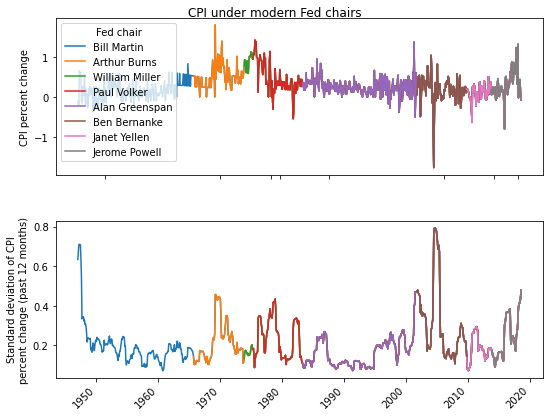

In [7]:
def get_xticks(x):
    xticks = []
    xtick_labels = []
    for i, date in enumerate(x):
        match = re.match(r"(\d\d\d\d)-01-01", date)
        if match:
            year = match.groups(0)[0]
            if year.endswith("0"):
                xticks.append(i)
                xtick_labels.append(year)
    return xticks, xtick_labels

scale = 1.25
cmap = plt.get_cmap("tab10")
fig, ax = plt.subplots(2, 1, figsize=(scale * 6.4, scale * 4.8))

previous_date = df.DATE[0]

upper_plot_xticks = []
upper_plot_xticklabels = []

for i, (name, date) in enumerate(fed_chair_start_dates):
    tmp = df[df.DATE >= date]
    if i < len(fed_chair_start_dates) - 1:
        tmp = tmp[tmp.DATE > previous_date]
    ax[0].plot(tmp.DATE, tmp.CPIAUCSL_PCH, label=name, c=cmap(i))
    ax[1].plot(tmp.DATE, tmp.STDEV, label=name, c=cmap(i))
    previous_date = date

    upper_plot_xticks.append(tmp.head(1).index)
    upper_plot_xticklabels.append(name)

print(upper_plot_xticks)
print(upper_plot_xticklabels)
ax[0].legend(title="Fed chair")
ax[0].set_xticks(upper_plot_xticks)
ax[0].set_xticklabels(upper_plot_xticklabels)
ax[0].set_ylabel("CPI percent change")

xticks, xtick_labels = get_xticks(df.DATE)
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xtick_labels, rotation=45)
ax[1].set_ylabel(f"Standard deviation of CPI\npercent change (past {months} months)")

fig.suptitle(f"CPI under modern Fed chairs")
fig.autofmt_xdate(rotation=45)
fig.tight_layout(pad=2)